In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import mglearn

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

%matplotlib inline

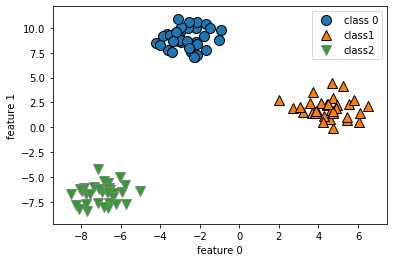

In [4]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class1', 'class2'])

In [6]:
X.shape

(100, 2)

In [7]:
y

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0])

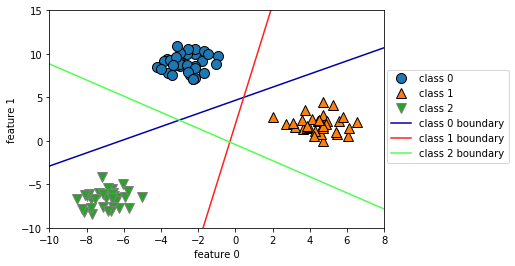

In [15]:
linear_svm = LinearSVC().fit(X, y)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary', 'class 2 boundary'], loc=(1.01, 0.3))

훈련데이터 클래스0에 속한 모든 포인트는 클래스0을 구분하는 직선위에. 즉 이진 분루기가 만든 클레스 0 지역에 위치하며, 나머지 클래스 역시 마찬가지다.
그런데 중앙의 삼각형의 경우는 어떨까? 세 개의 클래스 모두 나머지라고 분류한 지역이 중앙의 삼각형 지역이다. 정답은 분류 공식의 결과가 가장 높은 클래스로 분류된다.
즉 가장 가까운 직선의 클래스로 분류된다.

선형모델은 학습 속도가 빠르고 예측도 빠른 편이다. 매우 큰 데이터 셋과 희소한 데이터 셋에서도 잘 작동한다. 수십만에서 수 백만 개의 샘플로 이루어진 대용량 데이터 셋이라면 기본 설정보다 빠르게 처리하도록 로지스틱회귀와 릿지에 solver='sag' 옵션을 주거나 선형 모델의 대용량 처리 버전으로 구현된 SGD Classifier와 SGD Regressor를 사용하면 보다 신속한 처리가 가능하다.

선형 모델의 또 하나의 장점은 앞ㅇ서 회귀와 분류에서 본 공식을 사용해 예측이 어떻게 만들어지는지 비교적 쉽게 이해할 수 있다는 것이다. 하지만 계수들의 값이 왜 그런지 명확하지 않을 때도 종종 존재하므로 유의해야한다. 이는 특히나 데이터셋의 특성들이 서로 깊게 연관되어 있는 경우에 그렇다. 그리고 이런 경우 계수 분석은 매우 까다로울 수 있다.

선형 모델은 샘플에 비해 특성이 많을 때 잘 작동한다. 다른 모델로 학습하기 어려운 매우 큰 데이터 셋에도 선형 모델을 많이 사용한다. 그러나 저 차원의 데이터 셋에서는 다른 모델들의 일반화 성능이 더 좋다.